# Model on Titanic Survival

# Reading in titanic data

In [1]:
import pandas as pd

df = pd.read_csv('titanic_dataset.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dropping columns not needed

In [3]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Removing records where there are null values in columns used

In [4]:
columns_using = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_clean = df.dropna(subset=columns_using).reset_index(drop=True)


In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 44.6+ KB


## Converting "Sex" column to numerical, 0 is mapped to female and 1 to male

In [6]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
df_clean['Sex'] = le_sex.fit_transform(df_clean['Sex'])

## One hot encoding for Embarked feature, Embarked_Q and Embarked_S column created

In [7]:
df_clean = pd.get_dummies(df_clean, columns=['Embarked'], drop_first=True)

In [8]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


## Removing "Survived" column from df and assigning as target var

In [9]:
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']


## Splitting DS 80/20

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Model

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## start predictions

In [12]:
y_pred = clf.predict(X_test)

## Evaluation

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        80
           1       0.77      0.70      0.73        63

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.77       143



## Confusion matrix

Confusion Matrix:


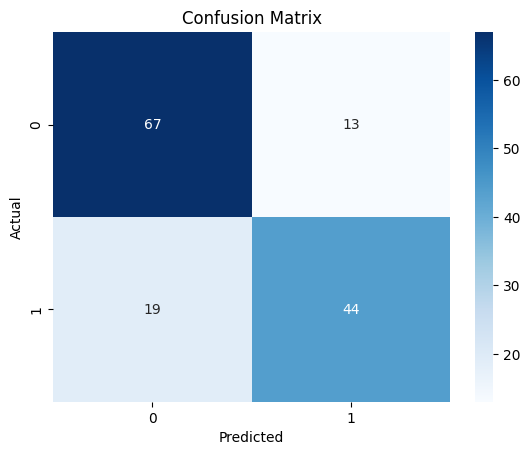

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter tuning using Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [10, 20, 30, 40, 50, None],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 3, 4], 
    'max_features': ['sqrt', 'log2'],        
    'bootstrap': [True, False]            
}


rf_model = RandomForestClassifier(random_state=42)              # initializaing model

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


In [16]:
y_pred_best = best_model.predict(X_test)

## model classification report after tuning

In [17]:
print("Tuned Model Report:")
print(classification_report(y_test, y_pred_best))

Tuned Model Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        80
           1       0.84      0.68      0.75        63

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.80      0.80       143



## Confusion Matrix after tuning

Confusion Matrix:


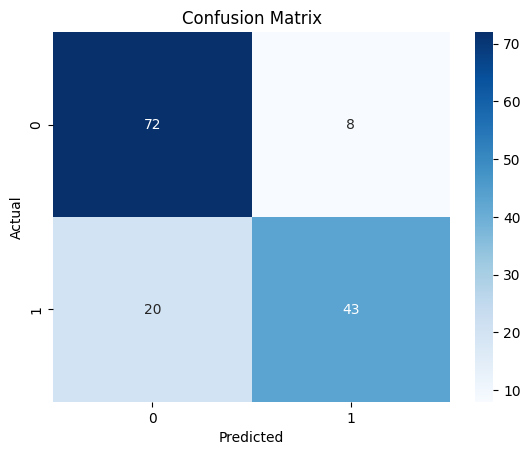

In [18]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()